## Data augmentation

The first step in training a good deep learning model is to get enough data. However, that's not always possible. What is possible though, it to apply some transformations on the data.

What we do is, instead of feeding the model with the same pictures every time, we do small random transformations (a bit of rotation, zoom, translation, etc…) that doesn’t change what’s inside the image (for the human eye) but changes its pixel values. Models trained with data augmentation will then generalize better. Data augmentation is also useful in situations when you have a relatively small number of training samples.

[A detailed article on data augmentation can be found here](https://towardsdatascience.com/data-augmentations-in-fastai-84979bbcefaa)

Let's try some augmentations on our dataset and see if they make sense.

In [1]:
!pip install fastai2

     |████████████████████████████████| 184 kB 7.2 MB/s 


In [2]:
from fastai2.vision.all import *

In [3]:
base = Path('../input/rsna-hemorrhage-jpg')

In [4]:
fn = get_image_files(base/'train_jpg/train_jpg/')
len(fn)

194082

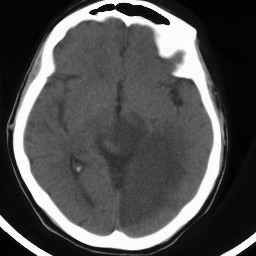

In [5]:
n = np.random.randint(0,1000)
img = PILImage.create(fn[n], mode = 'L')
img

### Crop -- not useful

It is generally a good idea to use something like CentreCrop or RandomCrop for image classification. However, we have already cropped our images during data cleaning and removed most of the background. Also, we might accidentally crop out useful information. Hence, we won't be using any crop or zoom transformations on our images

### Flip -- useful

The first transformation that we will try on our images is flipping or mirror image. The bleed can occur on either side hence this transformation won't change the meaning of any image.

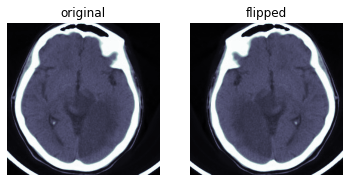

In [6]:
_,axs = subplots(1,2)
show_image(img, ctx=axs[0], title='original', cmap = plt.cm.bone)
show_image(img.flip_lr(), ctx=axs[1], title='flipped', cmap = plt.cm.bone);

### Rotation -- useful

As we've seen from the sample images, not all images are straight. Some of them have a slight tilt. Hence we will randomly rotate some images from -15 to 15 degrees

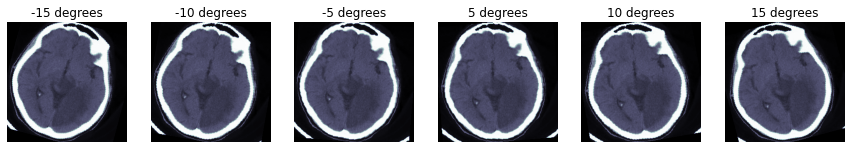

In [7]:
thetas = [-15,-10,-5,5,10,15]
_,axs = plt.subplots(1,6, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.rotate(thetas[i]), ctx=ax, title=f'{thetas[i]} degrees', cmap = plt.cm.bone)

### Dihedral -- not useful

Dihedral includes a number of flips and although we can force the ones we want, we will just use them separately (eg flip)

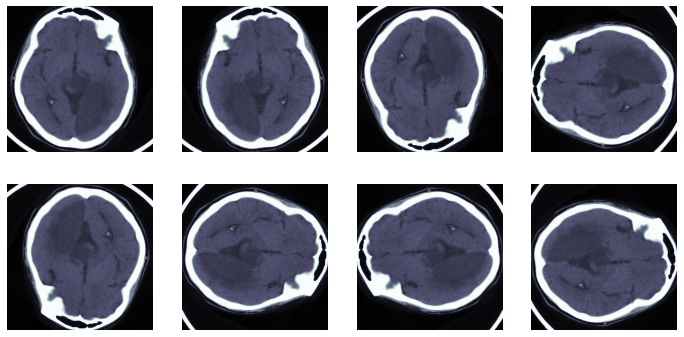

In [8]:
_,axs = subplots(2, 4)
for i,ax in enumerate(axs.flatten()):
    show_image(img.dihedral(i), ctx=ax, cmap=plt.cm.bone)

### Blur -- useful

If patients move during a CT scan, there can be artifacts in the scan. Those are really bad scans, however, even in the good ones, there can be a bit of blur. We will not introduce too much blur though.

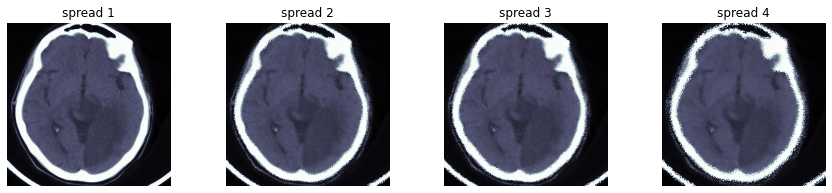

In [9]:
fig,axs = plt.subplots(1,4, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.effect_spread(i+1), ctx=ax, title=f'spread {i+1}', cmap=plt.cm.bone)

### Warp -- not useful

All the CT scans will have the same perspective and we don't want to change that.

### Brightness -- not useful

We don't want to mess around with the brightness either. All scans will have similar brightness.

### Resize - Progressive image resizing

The images in our dataset are of size (256,256). Progressive image resizing is a really useful technique for training deep learning models. In this technique, we train our model on smaller size images and gradually increase the size. This helps them train better.

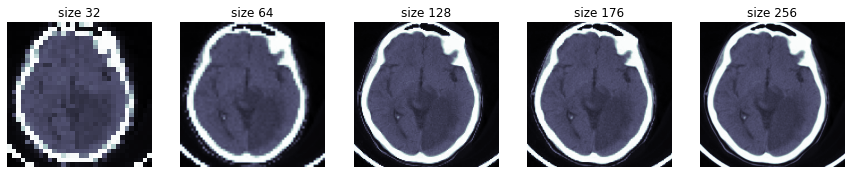

In [10]:
st = [(32,32),(64,64),(128,128),(176,176), (256,256)]
fig,axs = plt.subplots(1,5, figsize=(15,3))
for i,ax in enumerate(axs.flatten()):
    show_image(img.resize(st[i]), ctx=ax, title=f'size {st[i][0]}', cmap=plt.cm.bone)